<a href="https://colab.research.google.com/github/Alejandro-ZZ/Machine-Learning-UNS/blob/master/TP_3-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ejercicio 3.1.**

Se generarán distintos clasificadores K vecinos más cercanos (KNN) para evaluar su calidad a partir de la variación de parámetros como el porcentaje de datos para entrenamiento y prueba, la cantidad de vecinos cercanos (k), entre otros.

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

from matplotlib.colors import ListedColormap

## **Dataset #1**

Primer conjunto de datos de 2 dimensiones para posterior análisis  

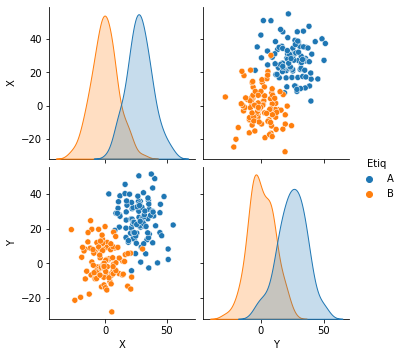

In [ ]:
np.random.seed(1)
features_number = 2

df_A1 = pd.DataFrame(np.random.normal(loc=25, scale=12, size=(100, features_number)),
                        columns=['X', 'Y'])
df_A1['Etiq'] = 'A'

df_B1 = pd.DataFrame(np.random.normal(scale=10, size=(100, features_number)),
                        columns=['X', 'Y'])
df_B1['Etiq'] = 'B'

dataset1 = pd.concat([df_A1, df_B1])
dataset1 = dataset1.reset_index().drop('index', axis=1)

sns.pairplot(dataset1, diag_kind="kde", hue='Etiq')
#dataset1.describe()

## **Dataset #2**

Segundo conjunto de datos de 2 dimensiones. A comparación del primer dataset, en este las variables estan más mezcladas (menor media y desviación estandar entre las etiquetas A y B).

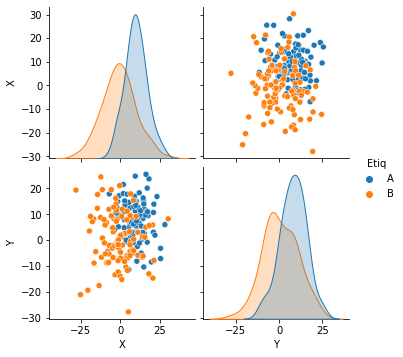

In [ ]:
np.random.seed(1)
features_number = 2

df_A2 = pd.DataFrame(np.random.normal(loc=8, scale=8, size=(100, features_number)),
                        columns=['X', 'Y'])
df_A2['Etiq'] = 'A'

df_B2 = pd.DataFrame(np.random.normal(scale=10, size=(100, features_number)),
                        columns=['X', 'Y'])
df_B2['Etiq'] = 'B'

dataset2 = pd.concat([df_A2, df_B2])
dataset2 = dataset2.reset_index().drop('index', axis=1)

sns.pairplot(dataset2, diag_kind="kde", hue='Etiq')

## **Análsis #1:** Dataset #1 | 50% Train | 50% Test

Se analiza el comportamiento del modelo, para distintos K, tomando un 50% del dataset para entrenamiento y 50% para prueba.

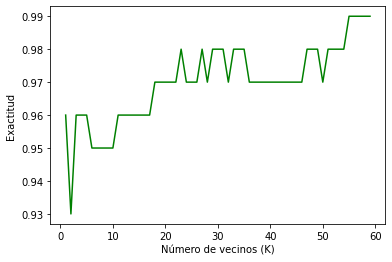

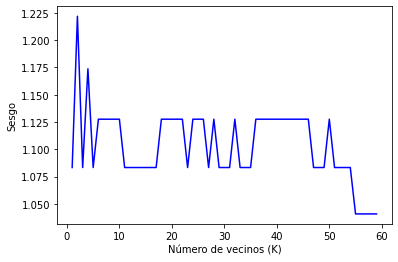

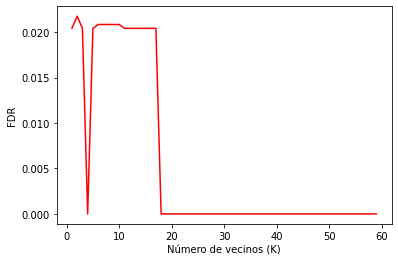

La máxima exactitud es de 0.99 y se presenta en K = 55


In [ ]:
# Objetivo (target)
y = dataset1['Etiq']
# Atributos (features)
X = dataset1[['X', 'Y']]

# Se divide el dataset para entrenar (50% train) y probar (50% test)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.5, random_state=4)
train_rows, train_columns = X_train.shape

# Codifica las etiquetas del target a valores numéricos
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

# Se escogen un máximo de K = N/2 +10
Ks = int(train_rows / 2 + 10)
exactitud = np.zeros((Ks-1))
tn = np.zeros((Ks-1))
fp = np.zeros((Ks-1))
fn = np.zeros((Ks-1))
tp = np.zeros((Ks-1))

for n in range(1,Ks):
    
    # Entrenamiento del modelo y predicción
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)

    exactitud[n-1] = metrics.accuracy_score(y_test, yhat)
    tn[n-1], fp[n-1], fn[n-1], tp[n-1] = confusion_matrix(y_test, yhat).ravel()

bias = ((tp+fn)/(tn+fp))/((tp+fp)/(tn+fn))
fdr = fp/(tp+fp)

plt.plot(range(1,Ks), exactitud,'g')
plt.ylabel('Exactitud ')
plt.xlabel('Número de vecinos (K)')
plt.show()

plt.plot(range(1,Ks), bias,'b')
plt.ylabel('Sesgo')
plt.xlabel('Número de vecinos (K)')
plt.show()

plt.plot(range(1,Ks), fdr,'r')
plt.ylabel('FDR')
plt.xlabel('Número de vecinos (K)')
plt.show()

print('La máxima exactitud es de {} y se presenta en K = {}'.format(max(exactitud), np.where(exactitud == max(exactitud))[0][0]+1))

Como se observa, para el **dataset #1** con un 50% de los datos para entrenamiento se presenta una **exactitud del 99% para k = 55**. También se observa que apartir de este valor de k, la exactitud se mantiene igual.
<br><br>
Ahora, se procede a conocer los parámetros de calidad para el clasificador con k=55 (a partir del [ejemplo con KNN en prediccion de iris](https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_iris_knn.html))

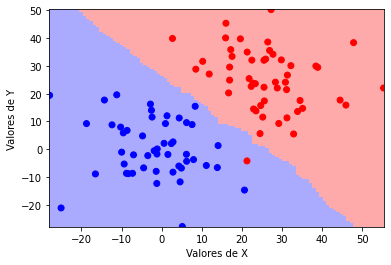

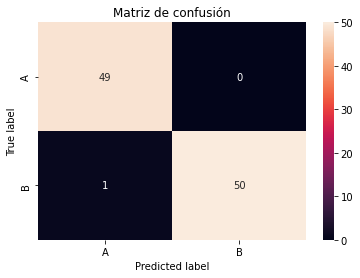

Exactitud = 0.99
Precision = 0.98
Recall = 1.0
F1-Score = 0.98989898989899


In [ ]:
# Entrenamiento del modelo y predicción
neigh = KNeighborsClassifier(n_neighbors = 55).fit(X_train,y_train)
yhat=neigh.predict(X_test)

# Crea un mapa de colores
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Preparación para el gráfico 
x_min, x_max = X_train.iloc[:, 0].min() - .1, X_train.iloc[:, 0].max() + .1
y_min, y_max = X_train.iloc[:, 1].min() - .1, X_train.iloc[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Se grafica los datos de entrenamiento
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=cmap_bold)
plt.xlabel('Valores de X')
plt.ylabel('Valores de Y')

plt.show()

# Matriz de confusión
confusion_matrix1 = pd.crosstab(le.inverse_transform(y_test), le.inverse_transform(yhat), rownames=['True label'], colnames=['Predicted label'])

sns.heatmap(confusion_matrix1, annot=True)
plt.title("Matriz de confusión")
plt.show()

# Se obtienen la cuenta para cada condicion
TP_count = confusion_matrix1.iloc[0]['A']
FN_count = confusion_matrix1.iloc[0]['B']
FP_count = confusion_matrix1.iloc[1]['A']
TN_count = confusion_matrix1.iloc[1]['B']


exactitud = (TP_count + TN_count) / (TP_count + TN_count + FN_count + FP_count)
precision = (TP_count) / (TP_count + FP_count)
recall = (TP_count) / (TP_count + FN_count)
F1_score = (2*precision*recall) / (precision + recall)

print("Exactitud = " + str(exactitud))
print("Precision = " + str(precision))
print("Recall = " + str(recall))
print("F1-Score = " + str(F1_score))

Luego de este análisis, se probará con mayor porcentaje de entrenamiento para ver como se comporta el modelo.

## **Análsis #2:** Dataset #1 | 80% Train | 20% Test

Se analiza el comportamiento del modelo, para distintos K, tomando un 80% del dataset #1 para entrenamiento y 20% para prueba.

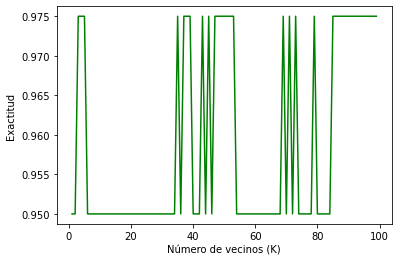

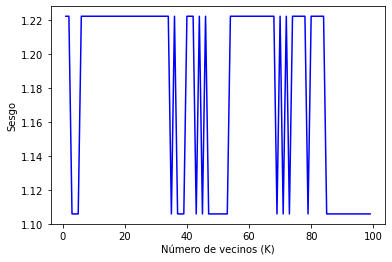

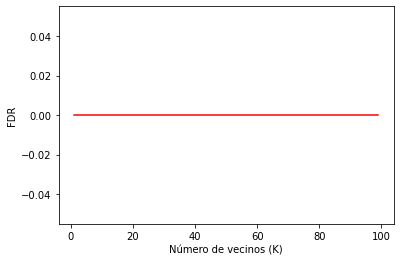

La máxima exactitud es de 0.975 y se presenta en K = 3


In [ ]:
# Se divide el dataset para entrenar (80% train) y probar (20% test)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
train_rows, train_columns = X_train.shape

# Codifica las etiquetas del target a valores numéricos
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

# Se escogen un máximo de K = N/2 +10
Ks = int(train_rows / 2 + 20)
exactitud = np.zeros((Ks-1))
tn = np.zeros((Ks-1))
fp = np.zeros((Ks-1))
fn = np.zeros((Ks-1))
tp = np.zeros((Ks-1))

for n in range(1,Ks):
    
    # Entrenamiento del modelo y predicción
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)

    exactitud[n-1] = metrics.accuracy_score(y_test, yhat)
    tn[n-1], fp[n-1], fn[n-1], tp[n-1] = confusion_matrix(y_test, yhat).ravel()

bias = ((tp+fn)/(tn+fp))/((tp+fp)/(tn+fn))
fdr = fp/(tp+fp)

plt.plot(range(1,Ks), exactitud,'g')
plt.ylabel('Exactitud ')
plt.xlabel('Número de vecinos (K)')
plt.show()

plt.plot(range(1,Ks), bias,'b')
plt.ylabel('Sesgo')
plt.xlabel('Número de vecinos (K)')
plt.show()

plt.plot(range(1,Ks), fdr,'r')
plt.ylabel('FDR')
plt.xlabel('Número de vecinos (K)')
plt.show()

print('La máxima exactitud es de {} y se presenta en K = {}'.format(max(exactitud), np.where(exactitud == max(exactitud))[0][0]+1))

Como se observa, para esta proporcion de datos para entrenamiento y prueba se obtienen valores de **exactitud ente 95% y el 97,5%**. Además, este último valor se presenta para varios valores de k, siendo el primero de ellos k = 3.
<br><br>
Ahora se observa más información para k = 3

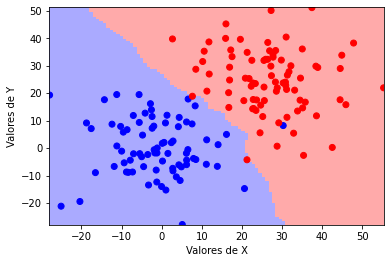

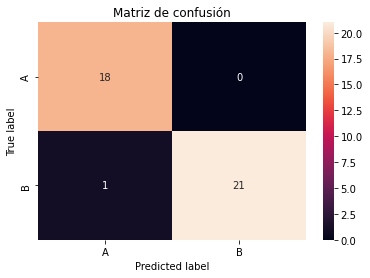

Exactitud = 0.975
Precision = 0.9473684210526315
Recall = 1.0
F1-Score = 0.972972972972973


In [ ]:
# Entrenamiento del modelo y predicción
neigh = KNeighborsClassifier(n_neighbors = 3).fit(X_train,y_train)
yhat=neigh.predict(X_test)

# Crea un mapa de colores
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Preparación para el gráfico 
x_min, x_max = X_train.iloc[:, 0].min() - .1, X_train.iloc[:, 0].max() + .1
y_min, y_max = X_train.iloc[:, 1].min() - .1, X_train.iloc[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Se grafica los datos de entrenamiento
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=cmap_bold)
plt.xlabel('Valores de X')
plt.ylabel('Valores de Y')

plt.show()

# Matriz de confusión
confusion_matrix2 = pd.crosstab(le.inverse_transform(y_test), le.inverse_transform(yhat), rownames=['True label'], colnames=['Predicted label'])

sns.heatmap(confusion_matrix2, annot=True)
plt.title("Matriz de confusión")
plt.show()

# Se obtienen la cuenta para cada condicion
TP_count = confusion_matrix2.iloc[0]['A']
FN_count = confusion_matrix2.iloc[0]['B']
FP_count = confusion_matrix2.iloc[1]['A']
TN_count = confusion_matrix2.iloc[1]['B']


exactitud = (TP_count + TN_count) / (TP_count + TN_count + FN_count + FP_count)
precision = (TP_count) / (TP_count + FP_count)
recall = (TP_count) / (TP_count + FN_count)
F1_score = (2*precision*recall) / (precision + recall)

print("Exactitud = " + str(exactitud))
print("Precision = " + str(precision))
print("Recall = " + str(recall))
print("F1-Score = " + str(F1_score))

A comparación del primer análisis, la calidad del modelo con un 20% de datos para prueba es menor con una exactitud máxima del 97,5% a comparacion del 99% con un 50% de datos para prueba.

## **Análsis #3:** Dataset #2 | 50% Train | 50% Test

Ahora se realizará el mismo análisis con el dataset número 2

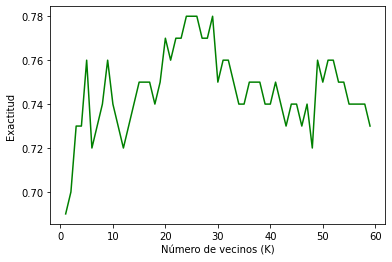

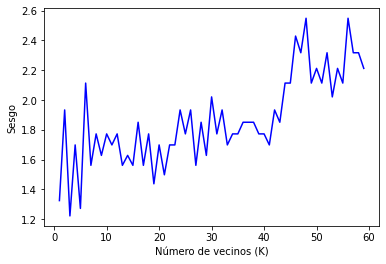

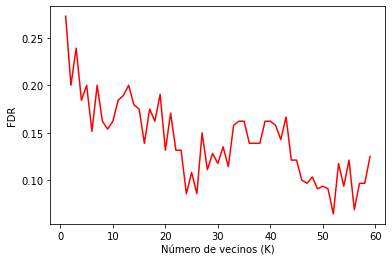

La máxima exactitud es de 0.78 y se presenta en K = 24


In [ ]:
# Objetivo (target)
y = dataset2['Etiq']
# Atributos (features)
X = dataset2[['X', 'Y']]

# Se divide el dataset para entrenar (50% train) y probar (50% test)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.5, random_state=4)
train_rows, train_columns = X_train.shape

# Codifica las etiquetas del target a valores numéricos
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

# Se escogen un máximo de K = N/2 +10
Ks = int(train_rows / 2 + 10)
exactitud = np.zeros((Ks-1))

tn = np.zeros((Ks-1))
fp = np.zeros((Ks-1))
fn = np.zeros((Ks-1))
tp = np.zeros((Ks-1))

for n in range(1,Ks):
    
    # Entrenamiento del modelo y predicción
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)

    exactitud[n-1] = metrics.accuracy_score(y_test, yhat)
    tn[n-1], fp[n-1], fn[n-1], tp[n-1] = confusion_matrix(y_test, yhat).ravel()

bias = ((tp+fn)/(tn+fp))/((tp+fp)/(tn+fn))
fdr = fp/(tp+fp)

plt.plot(range(1,Ks), exactitud,'g')
plt.ylabel('Exactitud ')
plt.xlabel('Número de vecinos (K)')
plt.show()

plt.plot(range(1,Ks), bias,'b')
plt.ylabel('Sesgo')
plt.xlabel('Número de vecinos (K)')
plt.show()

plt.plot(range(1,Ks), fdr,'r')
plt.ylabel('FDR')
plt.xlabel('Número de vecinos (K)')
plt.show()

print('La máxima exactitud es de {} y se presenta en K = {}'.format(max(exactitud), np.where(exactitud == max(exactitud))[0][0]+1))

Con un dataset más mezclado, y una proporcion 50-50 entre los datos de entrenamiento y prueba, se obtiene una **exactitud máxima del 78% para un k = 24**.
<br><br>
Ahora se analiza el modelo para un K = 24

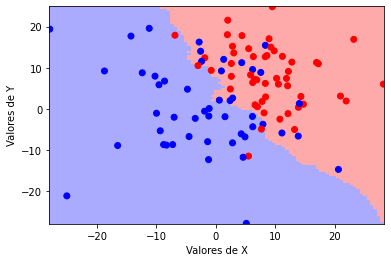

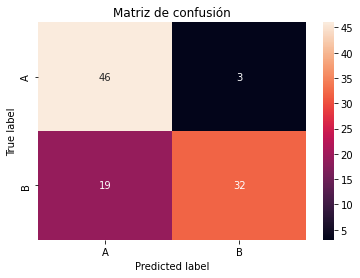

Exactitud = 0.78
Precision = 0.7076923076923077
Recall = 0.9387755102040817
F1-Score = 0.8070175438596492


In [ ]:
# Entrenamiento del modelo y predicción
neigh = KNeighborsClassifier(n_neighbors = 24).fit(X_train,y_train)
yhat=neigh.predict(X_test)

# Crea un mapa de colores
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Preparación para el gráfico 
x_min, x_max = X_train.iloc[:, 0].min() - .1, X_train.iloc[:, 0].max() + .1
y_min, y_max = X_train.iloc[:, 1].min() - .1, X_train.iloc[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Se grafica los datos de entrenamiento
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=cmap_bold)
plt.xlabel('Valores de X')
plt.ylabel('Valores de Y')

plt.show()

# Matriz de confusión
confusion_matrix3 = pd.crosstab(le.inverse_transform(y_test), le.inverse_transform(yhat), rownames=['True label'], colnames=['Predicted label'])

sns.heatmap(confusion_matrix3, annot=True)
plt.title("Matriz de confusión")
plt.show()

# Se obtienen la cuenta para cada condicion
TP_count = confusion_matrix3.iloc[0]['A']
FN_count = confusion_matrix3.iloc[0]['B']
FP_count = confusion_matrix3.iloc[1]['A']
TN_count = confusion_matrix3.iloc[1]['B']


exactitud = (TP_count + TN_count) / (TP_count + TN_count + FN_count + FP_count)
precision = (TP_count) / (TP_count + FP_count)
recall = (TP_count) / (TP_count + FN_count)
F1_score = (2*precision*recall) / (precision + recall)

print("Exactitud = " + str(exactitud))
print("Precision = " + str(precision))
print("Recall = " + str(recall))
print("F1-Score = " + str(F1_score))

## **Análsis #4:** Dataset #2 | 80% Train | 20% Test

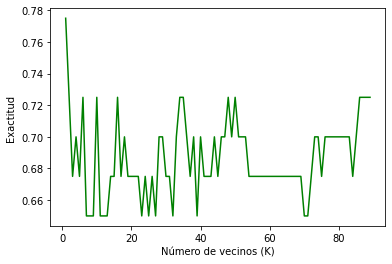

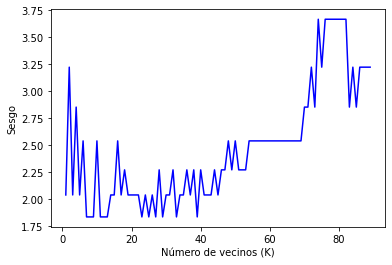

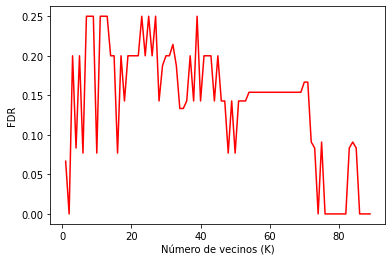

La máxima exactitud es de 0.775 y se presenta en K = 1


In [ ]:
# Se divide el dataset para entrenar (50% train) y probar (50% test)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
train_rows, train_columns = X_train.shape

# Codifica las etiquetas del target a valores numéricos
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

# Se escogen un máximo de K = N/2 +10
Ks = int(train_rows / 2 + 10)
exactitud = np.zeros((Ks-1))

tn = np.zeros((Ks-1))
fp = np.zeros((Ks-1))
fn = np.zeros((Ks-1))
tp = np.zeros((Ks-1))

for n in range(1,Ks):
    
    # Entrenamiento del modelo y predicción
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)

    exactitud[n-1] = metrics.accuracy_score(y_test, yhat)
    tn[n-1], fp[n-1], fn[n-1], tp[n-1] = confusion_matrix(y_test, yhat).ravel()

bias = ((tp+fn)/(tn+fp))/((tp+fp)/(tn+fn))
fdr = fp/(tp+fp)

plt.plot(range(1,Ks), exactitud,'g')
plt.ylabel('Exactitud ')
plt.xlabel('Número de vecinos (K)')
plt.show()

plt.plot(range(1,Ks), bias,'b')
plt.ylabel('Sesgo')
plt.xlabel('Número de vecinos (K)')
plt.show()

plt.plot(range(1,Ks), fdr,'r')
plt.ylabel('FDR')
plt.xlabel('Número de vecinos (K)')
plt.show()

print('La máxima exactitud es de {} y se presenta en K = {}'.format(max(exactitud), np.where(exactitud == max(exactitud))[0][0]+1))

En este caso, se presenta una exactitud del 77,5% para K = 1. Sin embargo, recuerdese que para K muy pequeños esto genera un sobreajuste (overfitting) y el modelo se vuelve inestable como se muestra a continuación:

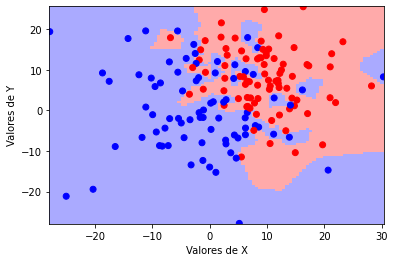

In [ ]:
# Entrenamiento del modelo y predicción
neigh = KNeighborsClassifier(n_neighbors = 1).fit(X_train,y_train)
yhat=neigh.predict(X_test)

# Crea un mapa de colores
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Preparación para el gráfico 
x_min, x_max = X_train.iloc[:, 0].min() - .1, X_train.iloc[:, 0].max() + .1
y_min, y_max = X_train.iloc[:, 1].min() - .1, X_train.iloc[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Se grafica los datos de entrenamiento
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=cmap_bold)
plt.xlabel('Valores de X')
plt.ylabel('Valores de Y')

plt.show()

In [ ]:
np.where(exactitud == 0.725)

(array([ 1,  5,  9, 15, 33, 34, 47, 49, 85, 86, 87, 88]),)

In [ ]:
np.where(fdr < 0.1)

(array([ 0,  1,  3,  5,  9, 15, 47, 49, 71, 72, 73, 74, 75, 76, 77, 78, 79,
        80, 81, 82, 83, 84, 85, 86, 87, 88]),)

Para k = 1 se observan espacios/islas donde el modelo cambia la clasificación de forma repentina, haciendolo inestable.
<br><br>
Por ello, el siguiente valor de exactitud despues de 77,5% es del 72,5%. Este segundo valor se presenta para varios valores de k = [2, 6, 10, ...]. Para evitar el anterior fenómeno (overfitting) se elige un k para el cual se observa el menor sesgo y FDR. Se elige k = 48 

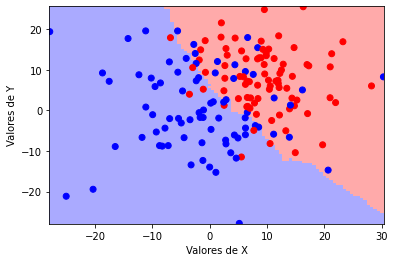

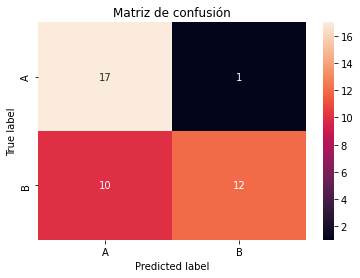

Exactitud = 0.725
Precision = 0.6296296296296297
Recall = 0.9444444444444444
F1-Score = 0.7555555555555556


In [ ]:
# Entrenamiento del modelo y predicción
neigh = KNeighborsClassifier(n_neighbors = 48).fit(X_train,y_train)
yhat=neigh.predict(X_test)

# Crea un mapa de colores
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Preparación para el gráfico 
x_min, x_max = X_train.iloc[:, 0].min() - .1, X_train.iloc[:, 0].max() + .1
y_min, y_max = X_train.iloc[:, 1].min() - .1, X_train.iloc[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Se grafica los datos de entrenamiento
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=cmap_bold)
plt.xlabel('Valores de X')
plt.ylabel('Valores de Y')

plt.show()

# Matriz de confusión
confusion_matrix4 = pd.crosstab(le.inverse_transform(y_test), le.inverse_transform(yhat), rownames=['True label'], colnames=['Predicted label'])

sns.heatmap(confusion_matrix4, annot=True)
plt.title("Matriz de confusión")
plt.show()

# Se obtienen la cuenta para cada condicion
TP_count = confusion_matrix4.iloc[0]['A']
FN_count = confusion_matrix4.iloc[0]['B']
FP_count = confusion_matrix4.iloc[1]['A']
TN_count = confusion_matrix4.iloc[1]['B']


exactitud = (TP_count + TN_count) / (TP_count + TN_count + FN_count + FP_count)
precision = (TP_count) / (TP_count + FP_count)
recall = (TP_count) / (TP_count + FN_count)
F1_score = (2*precision*recall) / (precision + recall)

print("Exactitud = " + str(exactitud))
print("Precision = " + str(precision))
print("Recall = " + str(recall))
print("F1-Score = " + str(F1_score))

Ahora, las islas vistas para k = 1 han desaparecido.

# **Conclusión**

1. Como era de esperarse, entre más mezclados se encuentren los datos (media y DS más cercana entre los datos) menor es la calidad del clasificador de K vecinos más cercanos.

2. Se observa que para una división del 50% de datos tanto para entrenamiento como para prueba, se obtienen mejores resultados en los parámetros de calidad del modelo a comparación de tomar 80% para entrenamiento y 20% para prueba.

3. En algunas gráficas de la exactitud en funcion de los K vecinos, se observa en repetidas ocaciones la exactitud máxima del modelo. En estos comportamiento es fundamental tener en cuenta la varianza y sesgo del clasificador para los K específicos a evaluar. 